In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder ,OneHotEncoder
import warnings 
warnings.filterwarnings("ignore")
from numpy import asarray


In [4]:
train=pd.read_csv("Train-Set.csv\\Train-Set.csv")
train.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


In [3]:
train.drop("id",axis=1,inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54712 entries, 56963 to 68268
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        54712 non-null  int64  
 1   job        54712 non-null  object 
 2   marital    54712 non-null  object 
 3   education  54712 non-null  object 
 4   default    54712 non-null  object 
 5   balance    31842 non-null  float64
 6   housing    54712 non-null  object 
 7   loan       54712 non-null  object 
 8   contact    54712 non-null  object 
 9   day        54712 non-null  object 
 10  month      54712 non-null  object 
 11  duration   54712 non-null  int64  
 12  campaign   54712 non-null  int64  
 13  pdays      54712 non-null  int64  
 14  previous   54712 non-null  int64  
 15  poutcome   54712 non-null  object 
 16  Target     54712 non-null  object 
dtypes: float64(1), int64(5), object(11)
memory usage: 7.5+ MB


In [5]:
train.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance      22870
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
dtype: int64

In [6]:
train.shape

(54712, 17)

In [7]:
null_balance_percent=(train.balance.isnull().sum())/(train.shape[0])*100
print("Percentage of null value in balance feature = {:.4f}%".format(null_balance_percent))

Percentage of null value in balance feature = 41.8007%


In [8]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


## Describe numaric values:

**1-Age:** minimum age is 17, maximum age is 98. (75% of the data between 17 and 48, there are outliers)

**2-Balance:** minimum is -8019 (illogical value), maximum is 98417. (there are outliers.)

**3-Duration:** minimum is 0 (no any call to the cusomer through the campaign), maximum is 4199. (75% of the data between 0 and 318. there are outliers)

**4-Campaign:** minimum is 1, maximum is 58, 75% of the data between 1 and 3 (there are outliers).

**if the minimum duration is 0 and minimum campaign is one there is illogical values ( we must handle them)**

**5-Pdays:** minimum is -1 (no contant in the previous campaign), maximum is 999.

**6-Previous:** minimum is 0, maximum is 58. 75% of the data is 0 value (low variance , may we drop it)

In [47]:
train.pdays.value_counts()

pdays
-1      26054
 999    21996
 3        261
 6        251
 182      117
        ...  
 413        1
 562        1
 495        1
 592        1
 531        1
Name: count, Length: 526, dtype: int64

In [9]:
train.describe(include='O')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,Target
count,54712,54712,54712,54712,54712,54712,54712,54712,54712,54712,54712
unique,12,4,11,3,3,3,3,41,17,5,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,may,unknown,no
freq,12042,33095,16357,49368,29666,45564,35134,7636,9651,26057,48433


## Notes:

**1-Blue-collar:** it is manual labor or skilled work that typically requires physical effort.

**2-Default, housing and loan:** they are binary features but each one has three unique values so there is some error we must handle it.

**3-Month:** it has 17 unique values but there are 12 months in the year. there is an error we must handle it. 

**4-Day:** the most frequent value is may, which is a month not a day. there is an error we must handle it. 

## Date visualization:


### Numarical:

**1-Target:**

<function matplotlib.pyplot.show(close=None, block=None)>

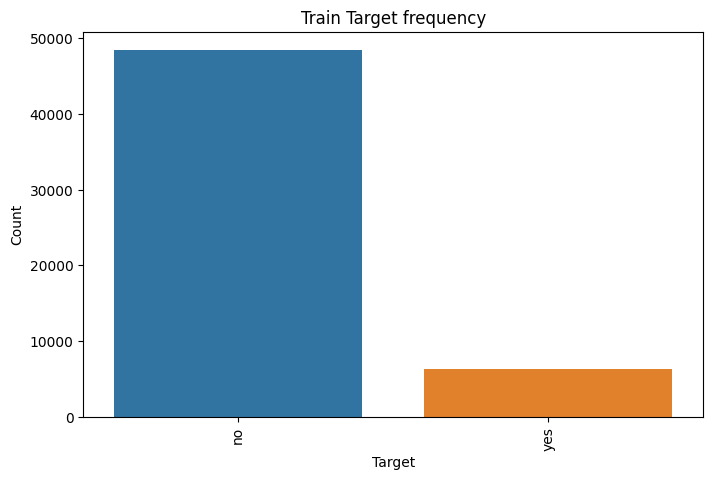

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=train['Target'])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Train Target frequency")
plt.xticks(rotation=90)
plt.show

**Unbalanced target we must used over-under sampling**

**2-Age**

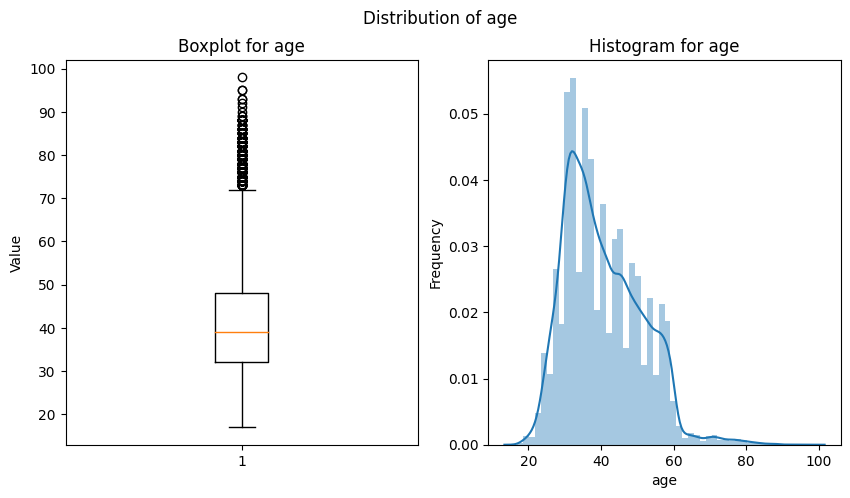

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.boxplot(x=train['age'])
ax1.set_title('Boxplot for age')

sns.distplot(train['age'])
ax2.set_title('Histogram for age')

# Add labels and titles
fig.suptitle('Distribution of age')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of the age based on the target')

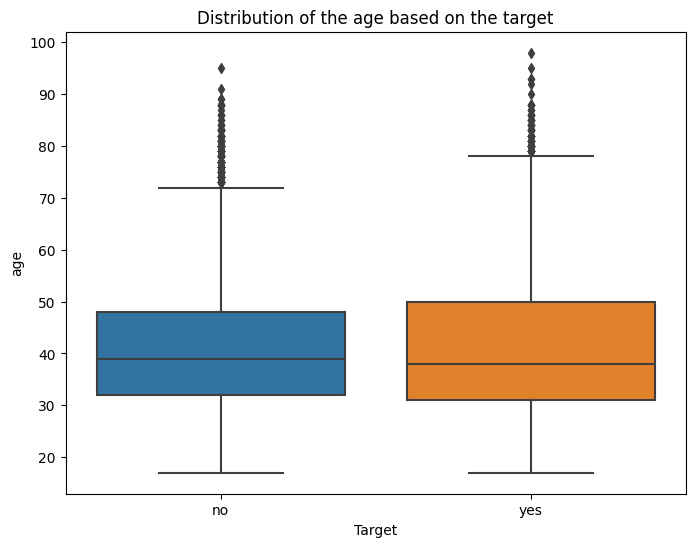

In [12]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="age", x="Target")
ax.set_title("Distribution of the age based on the target")

**3-Balance:**

In [13]:
train.balance.isnull().sum()

22870

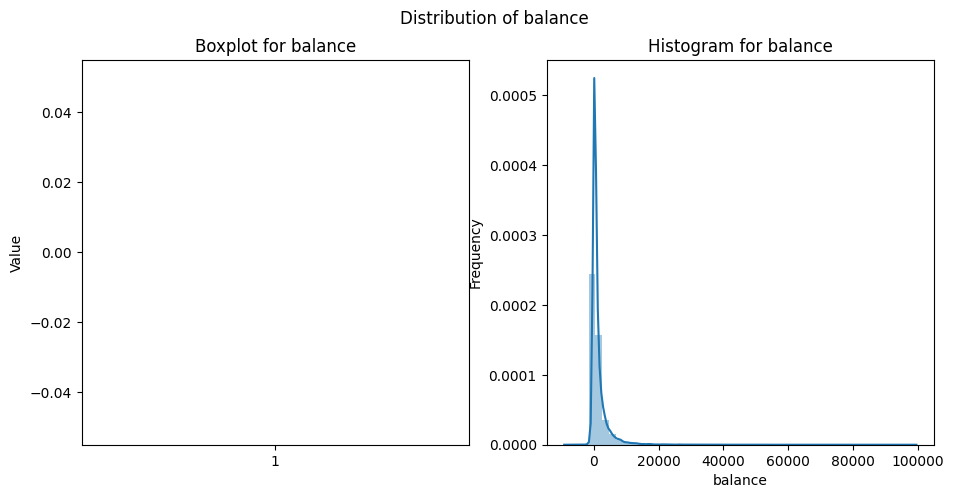

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.boxplot(x=train['balance'])
ax1.set_title('Boxplot for balance')

sns.distplot(train['balance'])
ax2.set_title('Histogram for balance')

# Add labels and titles
fig.suptitle('Distribution of balance')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

In [15]:
# illogical values: 
# What is the minimum balace must in the account??? may based on Q1

(train.balance.unique()<0).sum()

827

In [16]:
test=pd.read_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\2.Banking Dataset Analysis and Classification\\Datasets\\Train-Set.csv", index_col=0)
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


<Axes: xlabel='balance'>

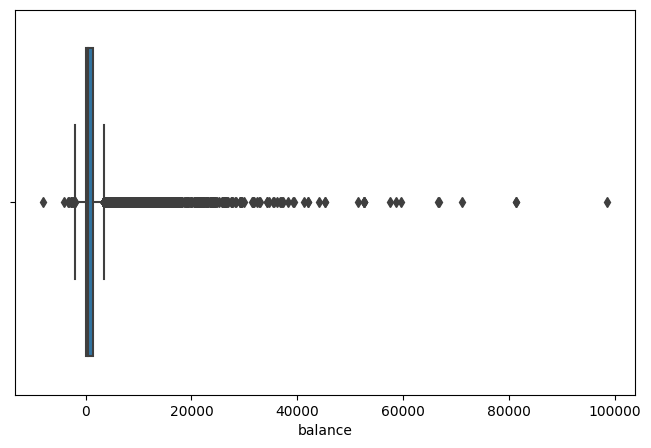

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train.balance)

Text(0.5, 1.0, 'Distribution of the balance based on the target')

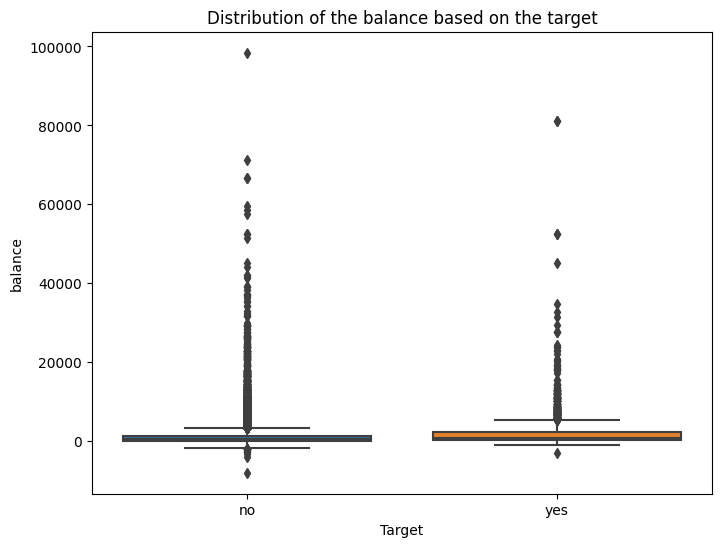

In [18]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="balance", x="Target")
ax.set_title("Distribution of the balance based on the target")

**this  column has null values and outliers**

**3-Duration:**

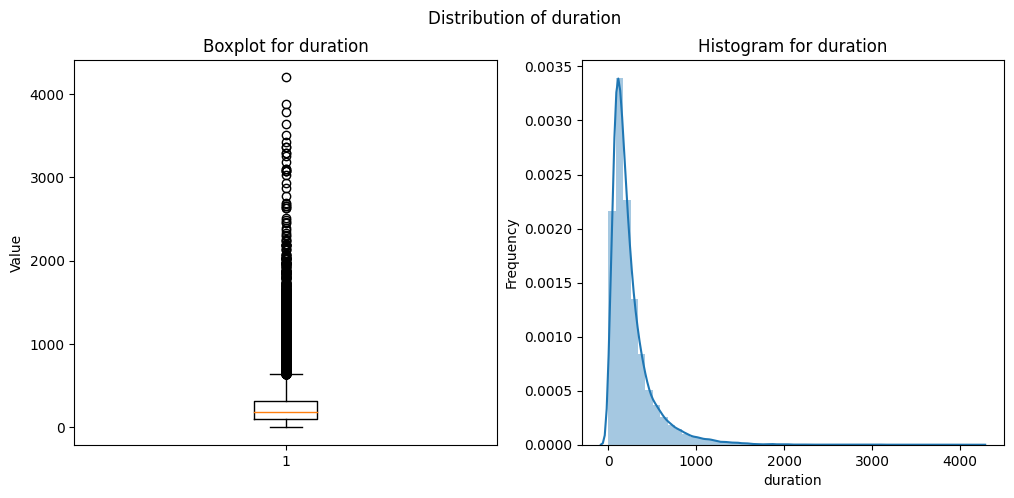

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(x=train['duration'])
ax1.set_title('Boxplot for duration')

sns.distplot(train['duration'])
ax2.set_title('Histogram for duration')

# Add labels and titles
fig.suptitle('Distribution of duration')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of the duration based on the target')

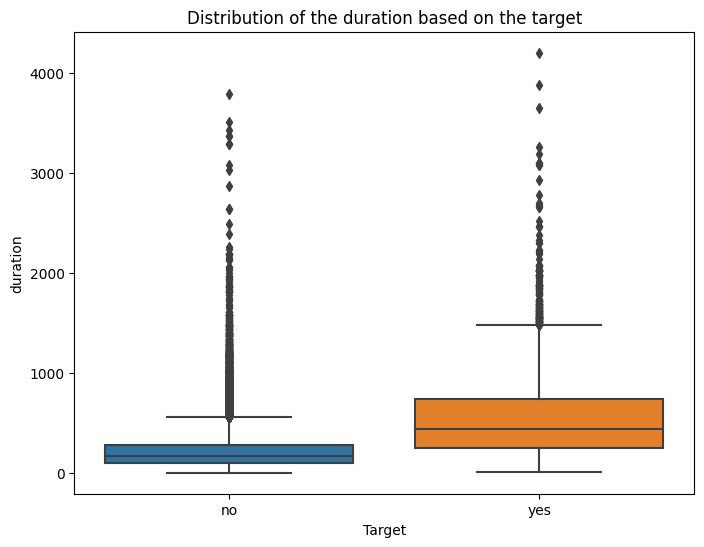

In [20]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="duration", x="Target")
ax.set_title("Distribution of the duration based on the target")

**4-Campaign:**

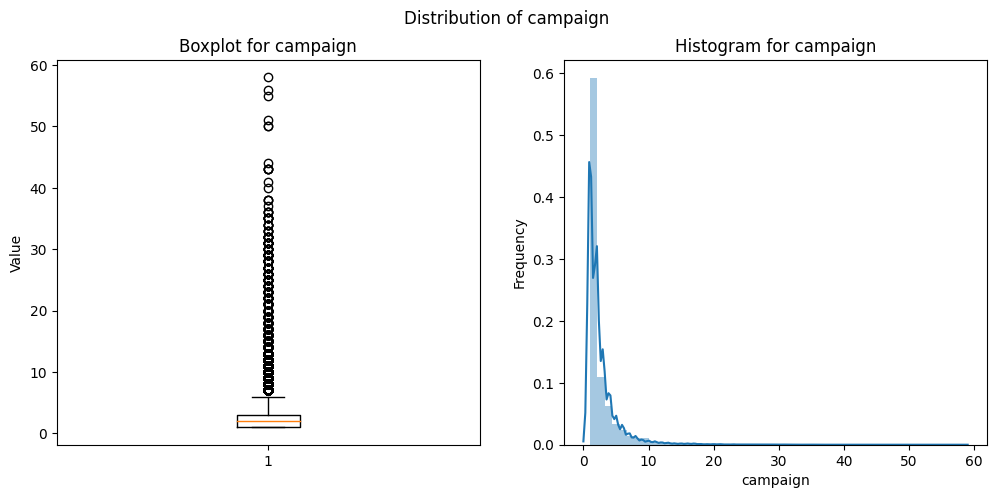

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(x=train['campaign'])
ax1.set_title('Boxplot for campaign')

sns.distplot(train['campaign'])
ax2.set_title('Histogram for campaign')

# Add labels and titles
fig.suptitle('Distribution of campaign')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of the campaign based on the target')

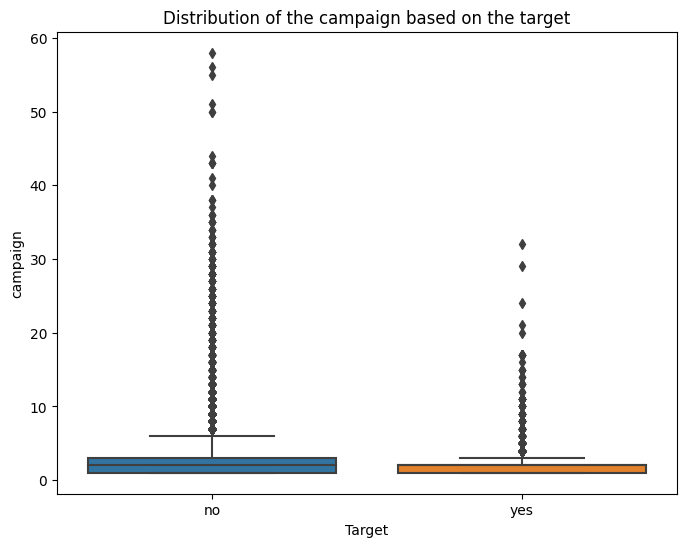

In [22]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="campaign", x="Target")
ax.set_title("Distribution of the campaign based on the target")

**4-Pdays:**

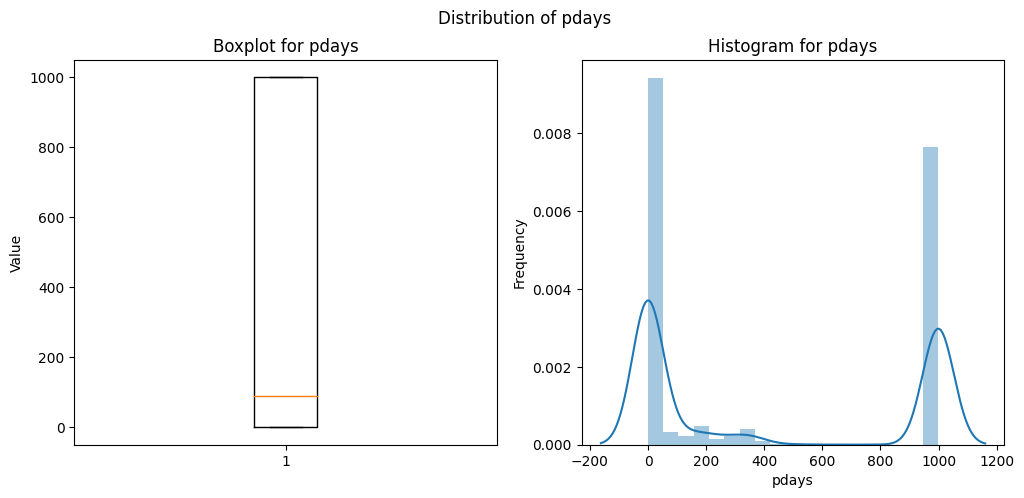

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(x=train['pdays'])
ax1.set_title('Boxplot for pdays')

sns.distplot(train['pdays'])
ax2.set_title('Histogram for pdays')

# Add labels and titles
fig.suptitle('Distribution of pdays')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

**there are two peaks (bimodal) (not good) we must solve this isuue.**

Text(0.5, 1.0, 'Distribution of the pdays based on the target')

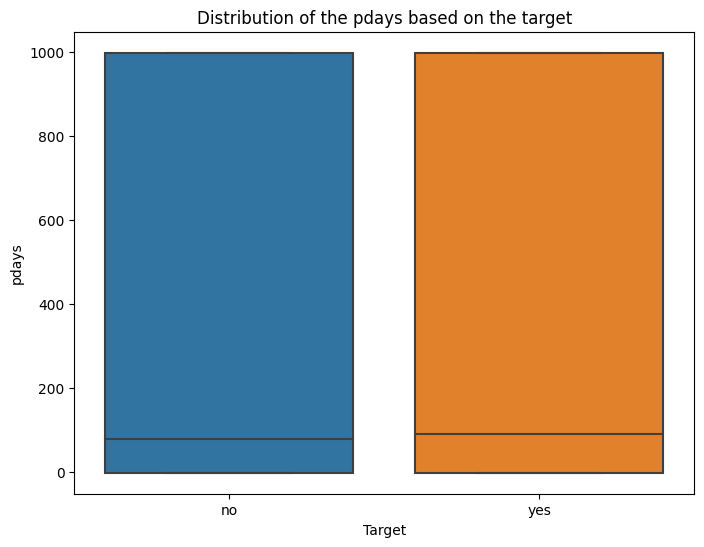

In [24]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="pdays", x="Target")
ax.set_title("Distribution of the pdays based on the target")

**5-Previous:**

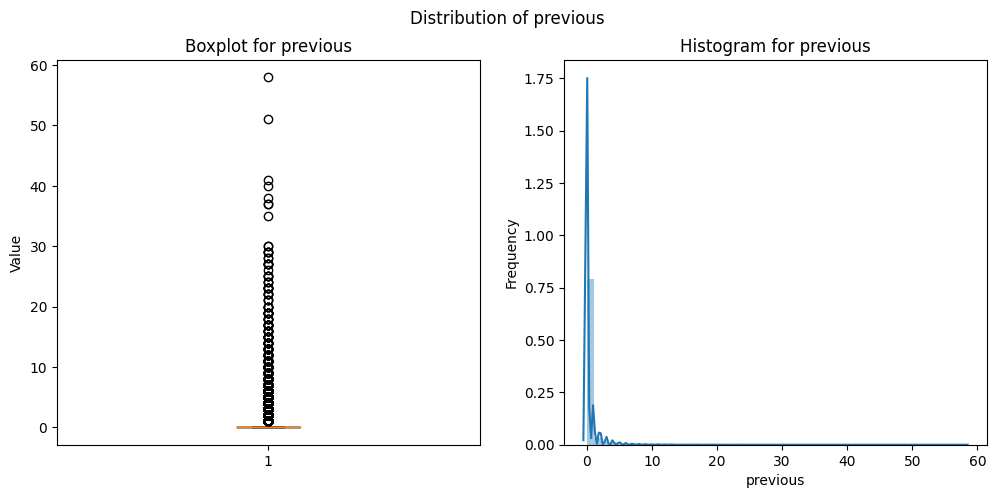

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(x=train['previous'])
ax1.set_title('Boxplot for previous')

sns.distplot(train['previous'])
ax2.set_title('Histogram for previous')

# Add labels and titles
fig.suptitle('Distribution of previous')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of the previous based on the target')

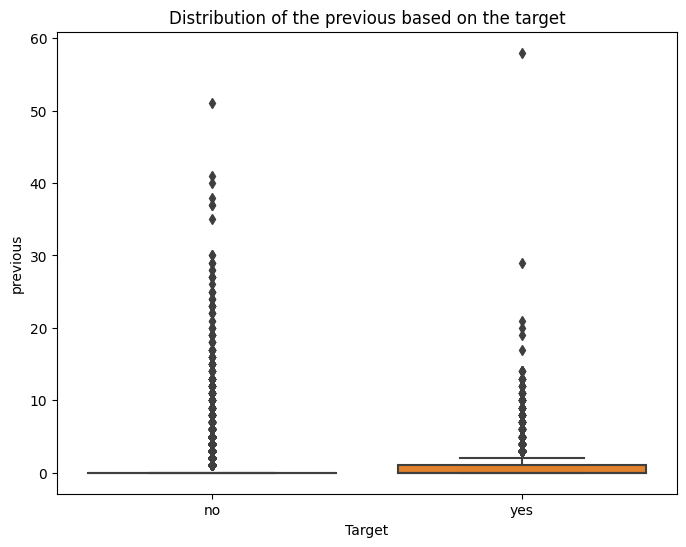

In [26]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(data=train, y="previous", x="Target")
ax.set_title("Distribution of the previous based on the target")

**we must check pdays, duration, campaign, poutcome, day, month columns because 75% of previous filled by 0 which is error. how previous is error if there's avalue in another mentioned columns!!!!**

# Correlation 

**between numeric columns**

<AxesSubplot:>

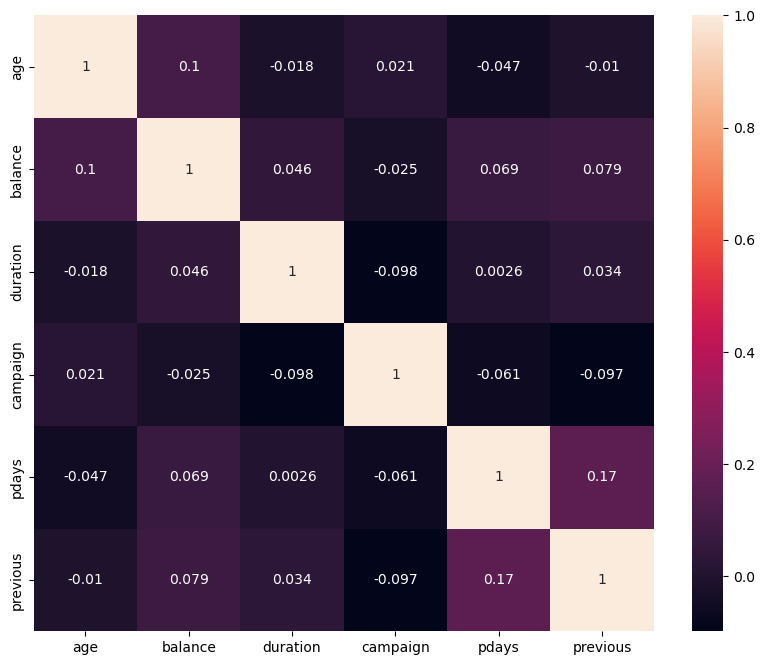

In [13]:
plt.figure(figsize=(10,8))

columns_to_remove = ['Unnamed: 0', 'id', 'poutcome', 'day', 'month']
data=train.drop(columns=columns_to_remove)

train_corr=data.corr(method='spearman')
sns.heatmap(train_corr,
            yticklabels=train_corr.columns.values,
           xticklabels=train_corr.columns.values,
           annot=True)

**The columns are independent of each other**


### Categorical:

**1-job:**

In [27]:
train.job.value_counts()

job
blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

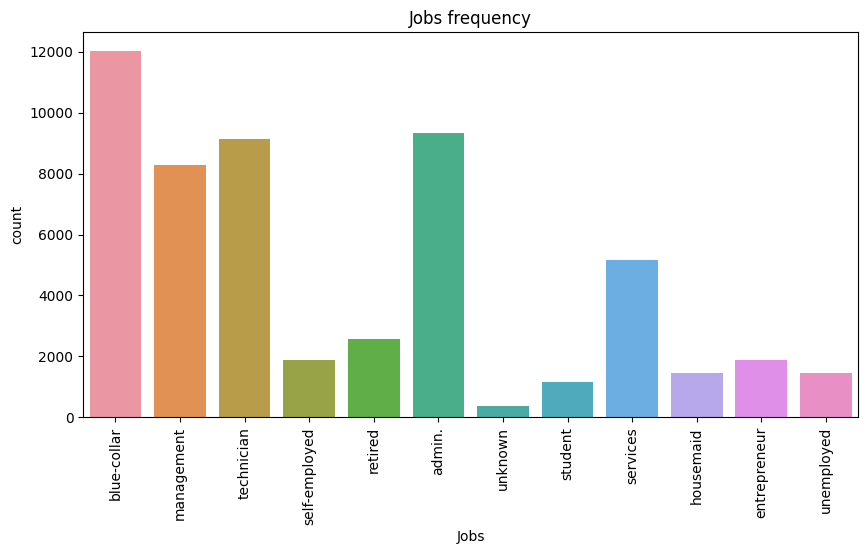

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['job'])
plt.xlabel("Jobs")
plt.ylabel("count")
plt.title("Jobs frequency")
plt.xticks(rotation=90)
plt.show

**There is unkown and students in the job unique values, students we must check the age of them. we can define the unknown as null values and try to fill them. we can remain it as it. 
we can check age columns to handle outliers in it according to job.**

**2-Marital:**

In [29]:
train.marital.value_counts()

marital
married     33095
single      15362
divorced     6209
unknown        46
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

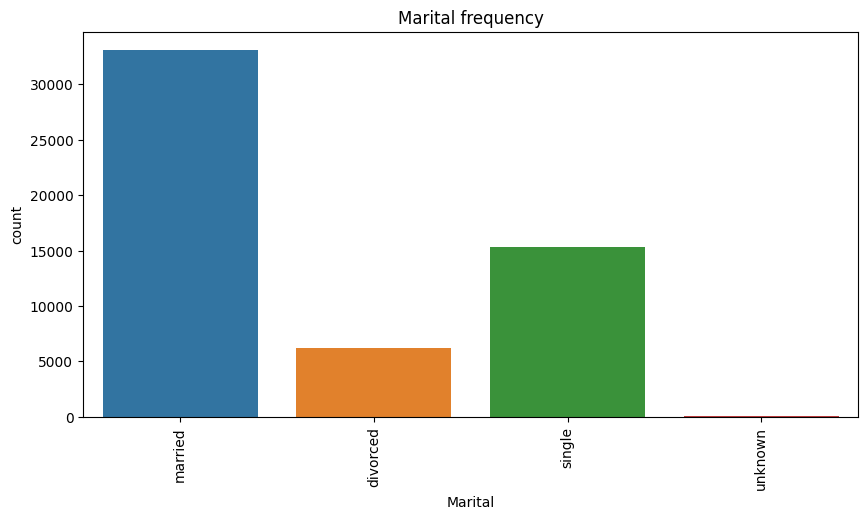

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['marital'])
plt.xlabel("Marital")
plt.ylabel("count")
plt.title("Marital frequency")
plt.xticks(rotation=90)
plt.show

**3-Education:**

In [31]:
train.education.value_counts()

education
secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

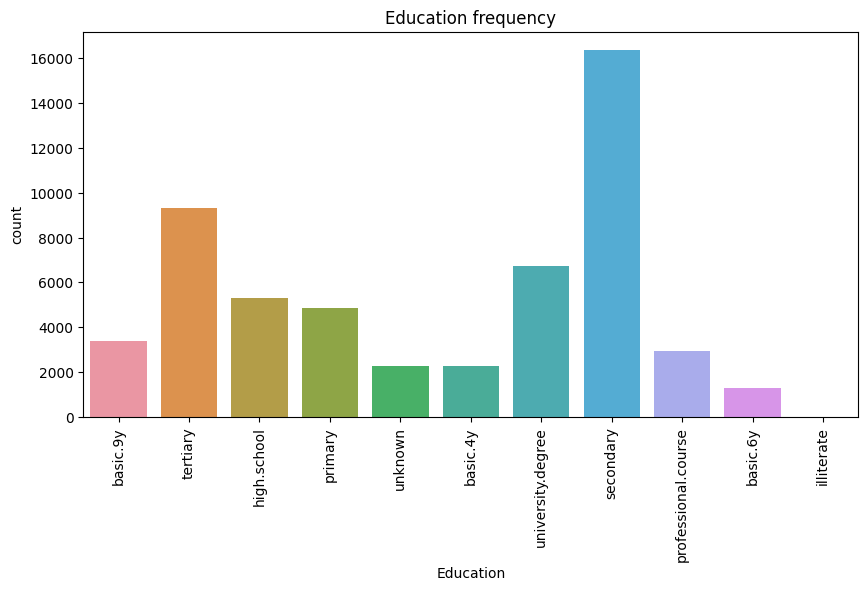

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['education'])
plt.xlabel("Education")
plt.ylabel("count")
plt.title("Education frequency")
plt.xticks(rotation=90)
plt.show

**1-Tertiary is an education level after secondary**

**2-basic.9y,basic.4y, basic.6y has different meanings:**

    basic.4y (1st Cycle): The first four years of primary education, typically from ages 6 to 10.
    basic.6y (2nd Cycle): The next two years of lower secondary education, usually from ages 10 to 12.
    basic.9y (3rd Cycle): The last three years of lower secondary education, typically from ages 12 to 15.
    
**3-high school and the secondary *maybe* the same.**

**4-tertiary can be incude the professional course, so we can make them the same unique value.**

**4-Default:**

In [33]:
train.default.value_counts()

default
no         49368
unknown     4754
yes          590
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

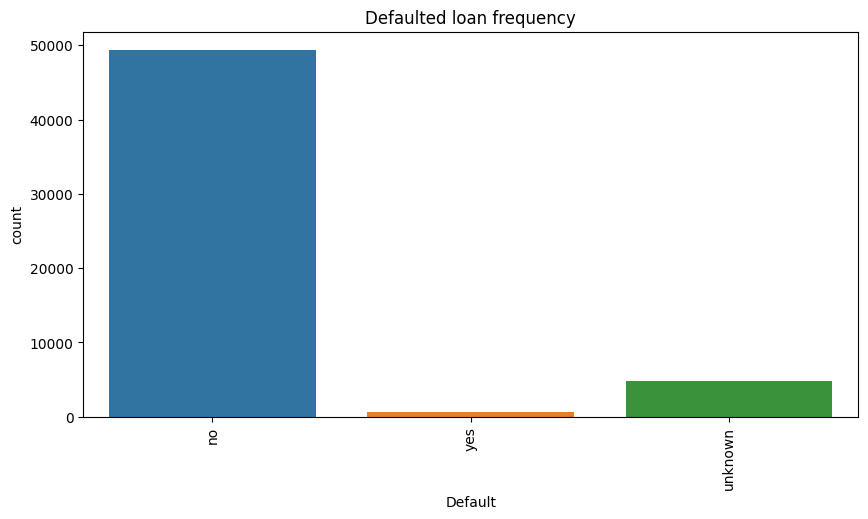

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['default'])
plt.xlabel("Default")
plt.ylabel("count")
plt.title("Defaulted loan frequency")
plt.xticks(rotation=90)
plt.show

**Unknown (has two options):**

**1- How does the bank not know if its customer has defaulted on any previous loans or credit or not ??? which is illogical value. can be considered as a null value and try to fill it.**

**2- the default indicates if the customer pay any previous loans or credit. maybe the unkown is a customers who does not has a loan or cridet!!!!**

**5-Housing:**

In [35]:
train.housing.value_counts()

housing
yes        29666
no         24503
unknown      543
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

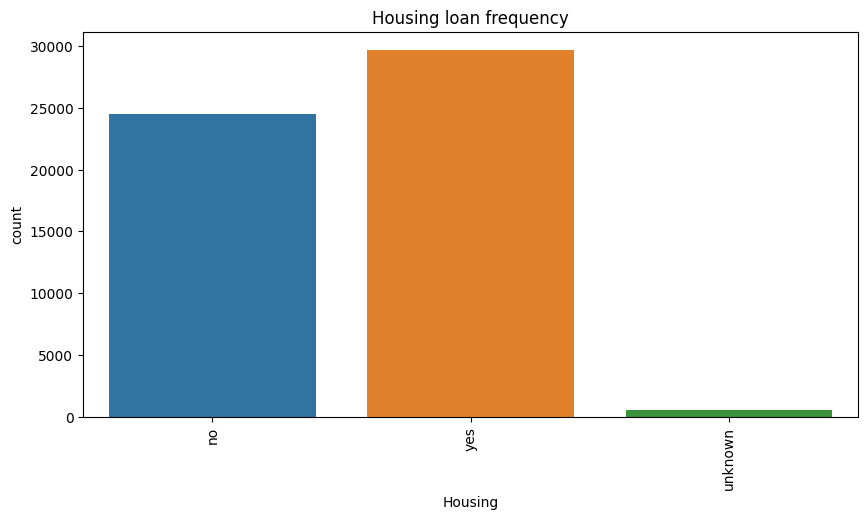

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['housing'])
plt.xlabel("Housing")
plt.ylabel("count")
plt.title("Housing loan frequency")
plt.xticks(rotation=90)
plt.show

**Unknown: How does the bank not know if its customer has housing loan or not ??? which is illogical value. can be considered as a null value and try to fill it.** 

**6-Loan:**

In [37]:
train.loan.value_counts()

loan
no         45564
yes         8605
unknown      543
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

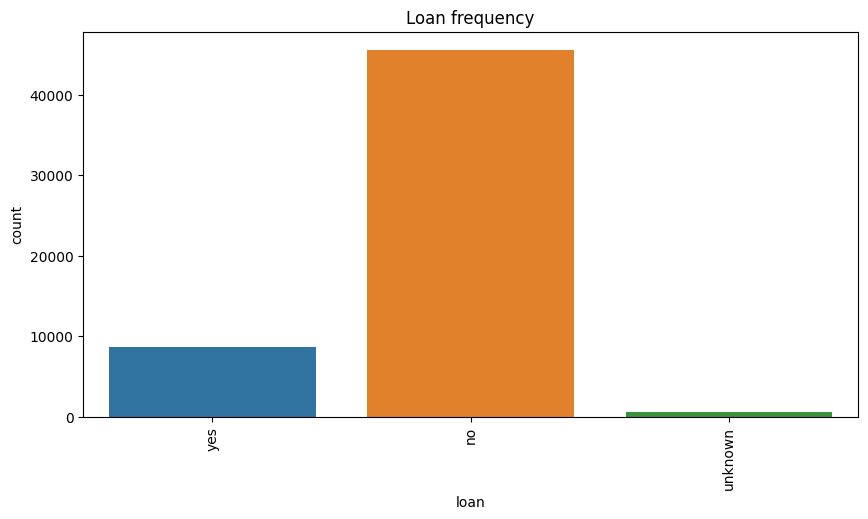

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['loan'])
plt.xlabel("loan")
plt.ylabel("count")
plt.title("Loan frequency")
plt.xticks(rotation=90)
plt.show

**Unknown: How does the bank not know if its customer has loan or not ??? which is illogical value. can be considered as a null value and try to fill it.** 

**7-Contact:**

In [39]:
train.contact.value_counts()

contact
cellular     35134
telephone    10424
unknown       9154
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

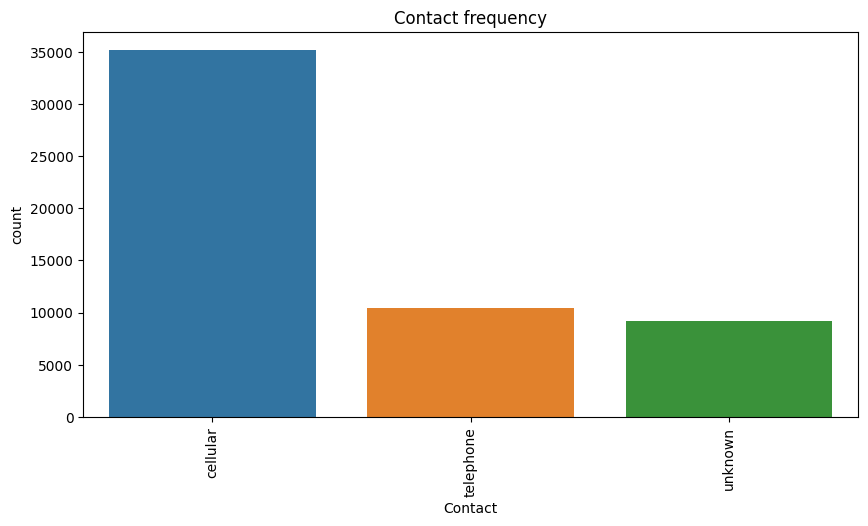

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['contact'])
plt.xlabel("Contact")
plt.ylabel("count")
plt.title("Contact frequency")
plt.xticks(rotation=90)
plt.show

**8-Day:**

In [41]:
train.day.value_counts()

day
may    7636
jul    4019
aug    3394
jun    2980
nov    2302
20     1958
18     1603
21     1443
apr    1425
17     1374
6      1368
5      1337
8      1322
14     1303
7      1279
28     1268
29     1208
19     1202
15     1195
13     1117
30     1107
12     1104
9      1091
11     1078
4      1039
16      991
2       896
27      776
26      761
3       752
23      656
22      649
25      600
31      468
oct     412
10      372
sep     320
24      300
mar     281
1       225
dec     101
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

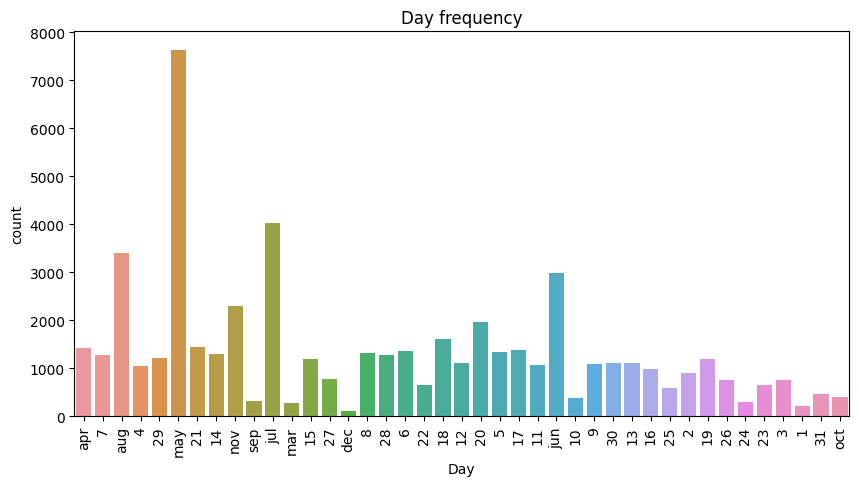

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['day'])
plt.xlabel("Day")
plt.ylabel("count")
plt.title("Day frequency")
plt.xticks(rotation=90)
plt.show

**any month has 30 or 31 days. there are name of months in the column. we can collect them in one column called unknown and try to fill them.**

**9-Month**

In [43]:
train.month.value_counts()

month
may    9651
jul    4875
thu    4758
mon    4728
wed    4508
tue    4483
aug    4437
fri    4393
jun    3720
nov    2815
apr    2076
feb    1878
jan     972
oct     500
sep     432
mar     335
dec     151
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

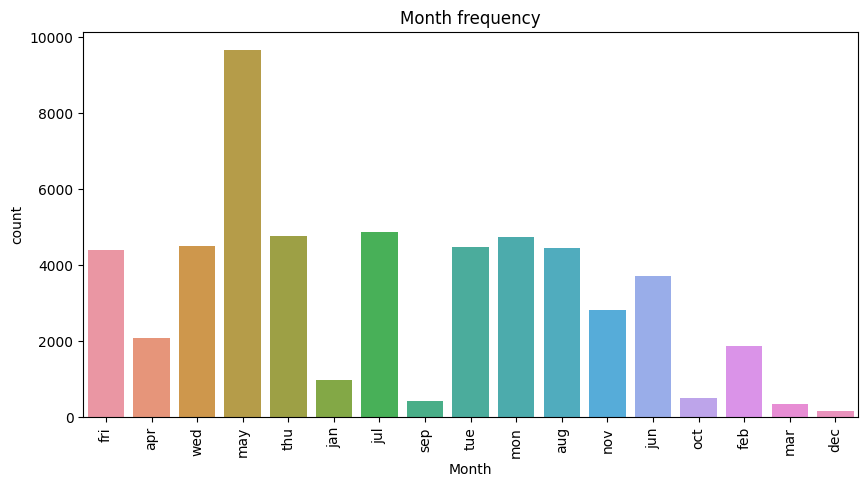

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['month'])
plt.xlabel("Month")
plt.ylabel("count")
plt.title("Month frequency")
plt.xticks(rotation=90)
plt.show

**any year has 12 months. there are name of days in the column. we can collect them in one column called unknown and try to fill them.**

**10-Poutcome:**

In [45]:
train.poutcome.value_counts()

poutcome
unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

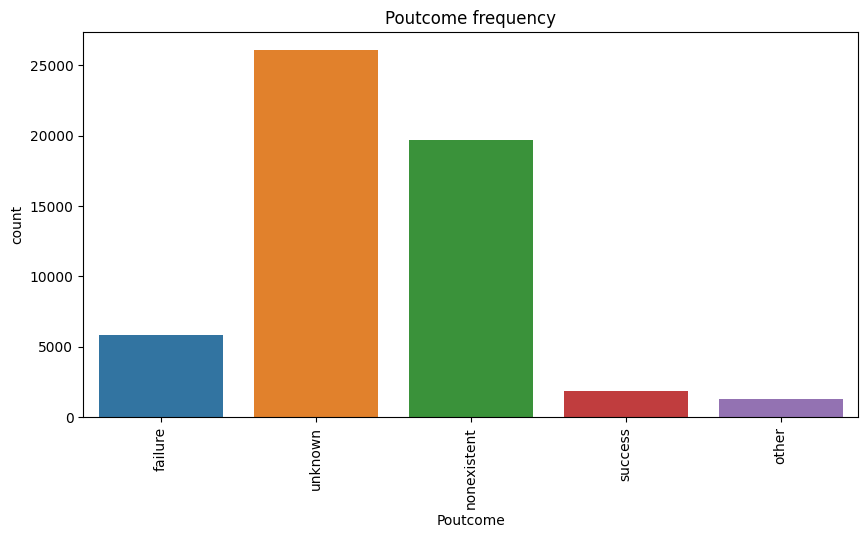

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['poutcome'])
plt.xlabel("Poutcome")
plt.ylabel("count")
plt.title("Poutcome frequency")
plt.xticks(rotation=90)
plt.show